#CNN
A Convolutional Neural Network (CNN) is a deep learning model used for image recognition.
It learns patterns like edges, shapes, and features from images and uses them to classify or recognize objects.

Training shape: (60000, 28, 28, 1)
Testing shape: (10000, 28, 28, 1)


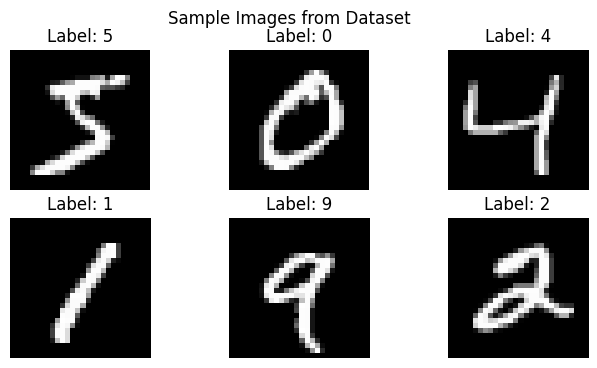

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8307 - loss: 0.5390 - val_accuracy: 0.9823 - val_loss: 0.0626
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9699 - loss: 0.1022 - val_accuracy: 0.9847 - val_loss: 0.0529
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9787 - loss: 0.0712 - val_accuracy: 0.9863 - val_loss: 0.0450
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9814 - loss: 0.0577 - val_accuracy: 0.9892 - val_loss: 0.0408
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9860 - loss: 0.0460 - val_accuracy: 0.9896 - val_loss: 0.0403


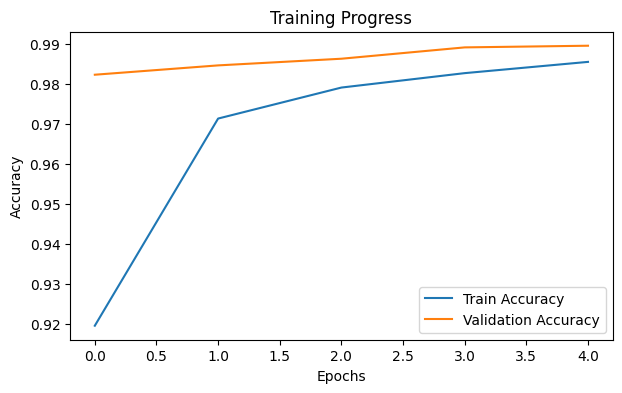

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9897 - loss: 0.0341

📍 Test Accuracy: 99.11 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


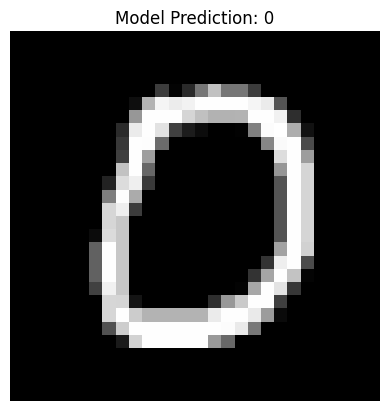

🔍 Model Prediction for image 10 is: 0


In [21]:
# -------------------------------------------
# PART 1 — CNN: Image Classification (MNIST)
# -------------------------------------------

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# 1) Load and prepare the data
# ----------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape so CNN understands it's grayscale (28x28x1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)

# ----------------------------------
# 2) Visualize sample training images
# ----------------------------------
plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from Dataset")
plt.show()

# -----------------------
# 3) Build CNN Model
# -----------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),  # prevents overfitting
    Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

model.summary()

# ---------------------------
# 4) Compile and Train Model
# ---------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# -------------------------------
# 5) Plot training performance
# -------------------------------
plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Progress")
plt.legend()
plt.show()

# -----------------------------
# 6) Evaluate on unseen test set
# -----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\n📍 Test Accuracy:", round(test_acc * 100, 2), "%")

# -----------------------------
# 7) Predict using the model
# -----------------------------
sample_index = 10  # Pick a random image index
sample_image = x_test[sample_index]

prediction = model.predict(sample_image.reshape(1,28,28,1))
predicted_digit = prediction.argmax()

plt.imshow(sample_image.reshape(28,28), cmap='gray')
plt.title(f"Model Prediction: {predicted_digit}")
plt.axis('off')
plt.show()

print(f"🔍 Model Prediction for image {sample_index} is:", predicted_digit)


This CNN learned patterns from handwritten images and reached strong accuracy on unseen test data.
The final prediction step shows the model can now correctly identify a new image of a handwritten digit.


0 → Ankle boot
1 → Pullover
2 → Trouser
3 → Trouser
4 → Shirt
5 → Trouser
6 → Coat
7 → Shirt
8 → Sandal
9 → Sneaker
10 → Coat
11 → Sandal
12 → Sneaker
13 → Dress
14 → Coat
15 → Trouser
16 → Pullover
17 → Coat
18 → Bag
19 → T-shirt/top


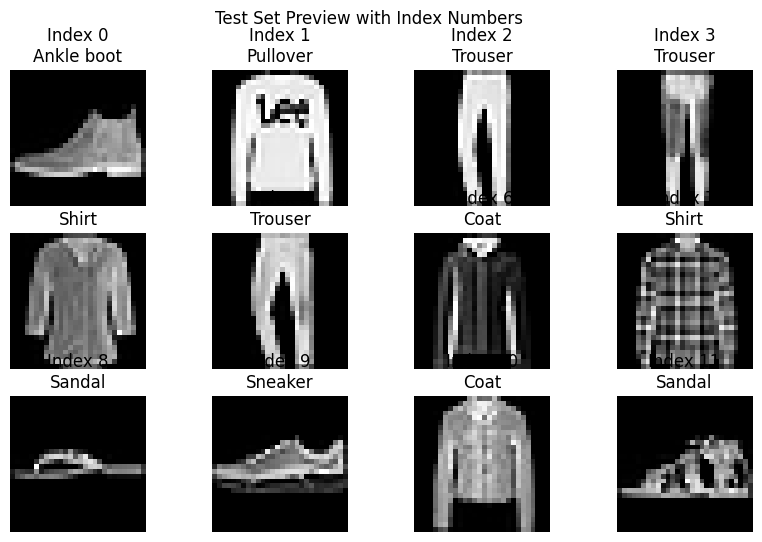

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Class names for interpretation (Fashion MNIST)
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Load and prepare Fashion MNIST data again for this visualization
(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_test_cnn = x_test_cnn / 255.0

# Reshape for CNN input
x_test_cnn = x_test_cnn.reshape(-1,28,28,1)

for i in range(20):
    print(i, "→", class_names[y_test_cnn[i]])
plt.figure(figsize=(10,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test_cnn[i].reshape(28,28), cmap='gray')
    plt.title(f"Index {i}\n{class_names[y_test_cnn[i]]}")
    plt.axis('off')
plt.suptitle("Test Set Preview with Index Numbers")
plt.show()

Training shape: (60000, 28, 28, 1)


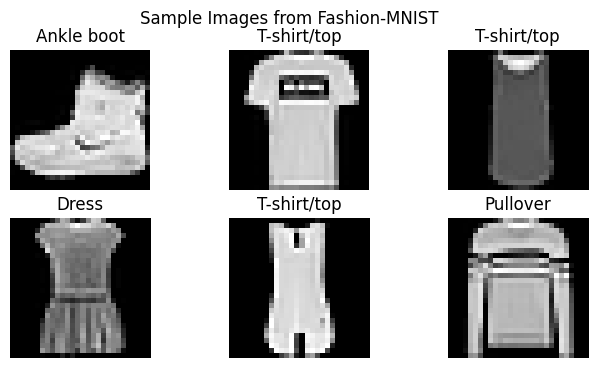

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7394 - loss: 0.7276 - val_accuracy: 0.8695 - val_loss: 0.3529
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 29ms/step - accuracy: 0.8717 - loss: 0.3559 - val_accuracy: 0.8770 - val_loss: 0.3283
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.8901 - loss: 0.3015 - val_accuracy: 0.8984 - val_loss: 0.2701
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 95s 39ms/step - accuracy: 0.9046 - loss: 0.2596 - val_accuracy: 0.9061 - val_loss: 0.2566
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 29ms/step - accuracy: 0.9109 - loss: 0.2354 - val_accuracy: 0.9052 - val_loss: 0.2699
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9195 - loss: 0.2185 - val_accuracy: 0.9039 - val_loss: 0.2587


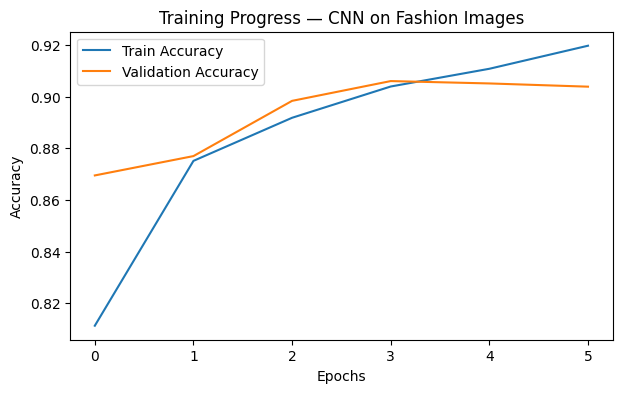

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9005 - loss: 0.2677

❖ Test Accuracy: 90.15 %
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


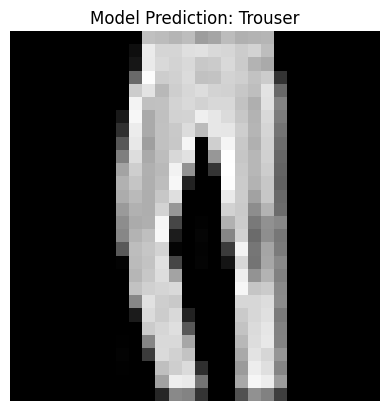

❖ Predicted: Trouser | Actual: Trouser


In [90]:
# -------------------------------------------
# └─ CNN Example — Fashion MNIST Classification
# -------------------------------------------

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Class labels for interpretation
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# ----------------------------
# 1) Load and prepare the data
# ----------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print("Training shape:", x_train.shape)

# ----------------------------------
# 2) Visualize some training images
# ----------------------------------
plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f"{class_names[y_train[i]]}")
    plt.axis('off')
plt.suptitle("Sample Images from Fashion-MNIST")
plt.show()

# -----------------------
# 3) Build CNN Model
# -----------------------
fashion_cnn_model_trained = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 classes
])

fashion_cnn_model_trained.summary()

# ---------------------------
# 4) Compile and Train Model
# ---------------------------
fashion_cnn_model_trained.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = fashion_cnn_model_trained.fit(x_train, y_train, epochs=6, validation_split=0.2)

# -------------------------------
# 5) Plot learning performance
# -------------------------------
plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Progress — CNN on Fashion Images")
plt.legend()
plt.show()

# -----------------------------
# 6) Evaluate on unseen test set
# -----------------------------
test_loss, test_acc = fashion_cnn_model_trained.evaluate(x_test, y_test)
print("\n❖ Test Accuracy:", round(test_acc*100,2), "%")

# -----------------------------
# 7) Predict on a sample image
# -----------------------------
index = 5  # change to test different samples

sample = x_test[index]
prediction = fashion_cnn_model_trained.predict(sample.reshape(1,28,28,1))
predicted_class = prediction.argmax()

plt.imshow(sample.reshape(28,28), cmap='gray')
plt.title(f"Model Prediction: {class_names[predicted_class]}")
plt.axis('off')
plt.show()

print("❖ Predicted:", class_names[predicted_class],
      "| Actual:", class_names[y_test[index]])

Loaded Fashion CNN model successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


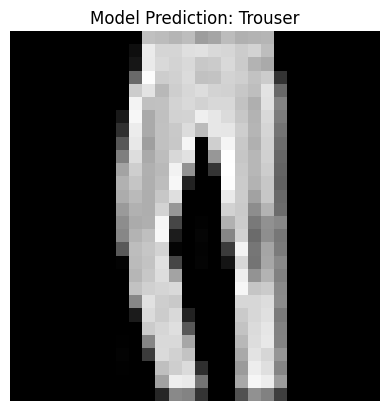

❖ Predicted: Trouser | Actual: Trouser


In [96]:
# Load the saved Fashion CNN model
from tensorflow.keras.models import load_model
fashion_cnn_model = load_model("fashion_cnn_model.keras")
print("Loaded Fashion CNN model successfully!")

# Assuming 'x_test' and 'y_test' are still from the Fashion MNIST dataset
# Ensure 'index' is defined, if not, set a default
if 'index' not in locals():
    index = 5  # default index if not previously defined

# Use the Fashion MNIST test data explicitly
sample = x_test[index] # x_test here should be the one from the Fashion MNIST (hzPOQNVkTKDC)
prediction = fashion_cnn_model.predict(sample.reshape(1,28,28,1))
predicted_class = prediction.argmax()

plt.imshow(sample.reshape(28,28), cmap='gray')
plt.title(f"Model Prediction: {class_names[predicted_class]}")
plt.axis('off')
plt.show()

print("❖ Predicted:", class_names[predicted_class],
      "| Actual:", class_names[y_test[index]]) # y_test here should be the one from the Fashion MNIST (hzPOQNVkTKDC)

In [41]:
index = 5  # change to test different samples

sample = x_test[index]
prediction = model.predict(sample.reshape(1,28,28,1))
predicted_class = prediction.argmax()

plt.imshow(sample.reshape(28,28), cmap='gray')
plt.title(f"Model Prediction: {class_names[predicted_class]}")
plt.axis('off')
plt.show()

print("🔍 Predicted:", class_names[predicted_class],
      "| Actual:", class_names[y_test[index]])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 28, 28, 1), dtype=float32). Expected shape (None, 1), but input has incompatible shape (1, 28, 28, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 28, 28, 1), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

This CNN model learned how to recognize clothing items in images using convolution and pooling layers.
After training, it can correctly predict unseen product images such as shoes, shirts, and bags.


#ANN
Artificial Neural Networks (ANNs) are used when our data is not an image, but numerical or tabular data.
Instead of learning visual patterns, ANNs learn relationships between input features and final output classes.
Today we build a simple ANN to classify smartwatch quality based on features like battery life and price.


In [51]:
# -------------------------------------------
# 📌 PART 2 — ANN: Smartwatch Quality Classification
# -------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ----------------------------
# 1) Create Synthetic Dataset
# ----------------------------

np.random.seed(42)
num_samples = 300

battery_life = np.random.randint(12, 48, num_samples)
heart_rate_accuracy = np.random.randint(85, 100, num_samples)
water_resistance = np.random.randint(20, 100, num_samples)
display_quality = np.random.randint(5, 10, num_samples)
price = np.random.randint(150, 600, num_samples)

# True output (0: low quality, 1: high quality)
quality = (battery_life * 0.02 +
           heart_rate_accuracy * 0.01 +
           display_quality * 0.5 -
           price * 0.003 +
           np.random.normal(0, 2, num_samples)) > 4

quality = quality.astype(int)

# Build DataFrame for visualization
df = pd.DataFrame({
    "Battery Life": battery_life,
    "Heart Accuracy": heart_rate_accuracy,
    "Display Quality": display_quality,
    "Price": price,
    "Quality": quality
})

df.head()


,Battery Life,Heart Accuracy,Display Quality,Price,Quality
0,40,85,5,430,0
1,26,92,6,508,0
2,19,98,7,350,1
3,32,98,6,395,1
4,30,96,7,427,1


In [52]:

q1 = np.array(True)
q1 = q1.astype(int)
print(q1)


1


##Visualize Data Distribution

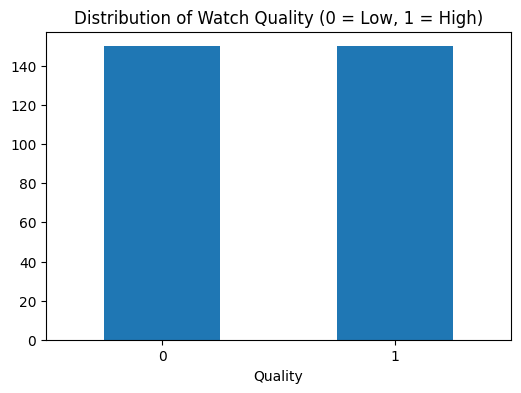

In [53]:
plt.figure(figsize=(6,4))
df['Quality'].value_counts().plot(kind='bar')
plt.title("Distribution of Watch Quality (0 = Low, 1 = High)")
plt.xticks(rotation=0)
plt.show()


##Prepare Data for ANN

In [54]:
# Train-test split
X = df.drop("Quality", axis=1)
y = df["Quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##Build and train

In [55]:
smartwatch_ann_model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # binary classification
])

smartwatch_ann_model.summary()

# Compile the model
smartwatch_ann_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = smartwatch_ann_model.fit(X_train, y_train, epochs=20, validation_split=0.2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6082 - loss: 0.6994 - val_accuracy: 0.6042 - val_loss: 0.6645
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4876 - loss: 0.7250 - val_accuracy: 0.6667 - val_loss: 0.6551
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5317 - loss: 0.7019 - val_accuracy: 0.7083 - val_loss: 0.6470
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5443 - loss: 0.6977 - val_accuracy: 0.7292 - val_loss: 0.6403
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6038 - loss: 0.6762 - val_accuracy: 0.7500 - val_loss: 0.6361
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5187 - loss: 0.7023 - val_accuracy: 0.7917 - val_loss: 0.6319
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5883 - loss: 0.6877 - val_accuracy: 0.7917 - val_loss: 0.6288
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5572 - loss: 0.6942 - val_accuracy: 0.7917 - val_loss: 0.6278


##Plot Accuracy

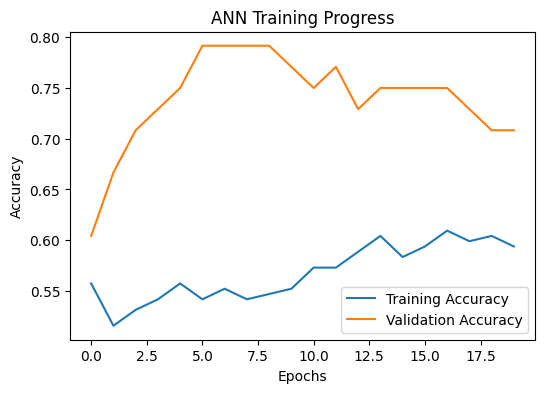

In [56]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("ANN Training Progress")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


##Evaluate ANN

In [59]:
loss, acc = smartwatch_ann_model.evaluate(X_test, y_test)
print("\n📍 Test Accuracy:", round(acc * 100, 2), "%")

# Manual Prediction
prediction = smartwatch_ann_model.predict(new_watch_scaled)[0][0]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7493 - loss: 0.6253

📍 Test Accuracy: 73.33 %
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


##Manual Val

In [60]:
# Example new watch: [Battery, HR accuracy, Display quality, Price]
new_watch = np.array([[30, 95, 8, 350]])

# Scale new data
new_watch_scaled = scaler.transform(new_watch)

prediction = smartwatch_ann_model.predict(new_watch_scaled)[0][0]

print("\nPrediction Confidence:", round(prediction, 2))
print("Model Output:", "High Quality 👍" if prediction > 0.5 else "Low Quality 👎")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step

Prediction Confidence: 0.57
Model Output: High Quality 👍


**ANN = the architecture**

Regression model or Classification model = the task.

##Example code

In [31]:
#example code

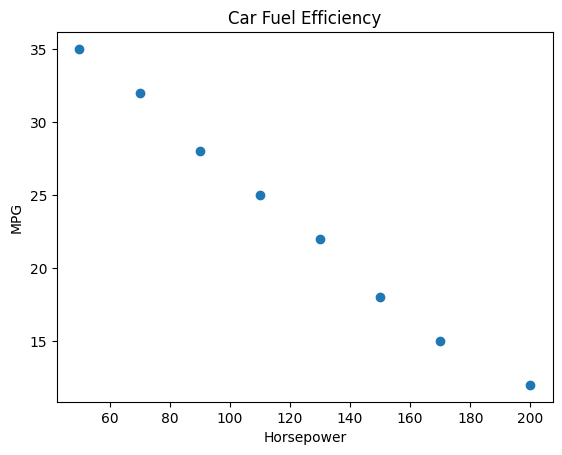

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


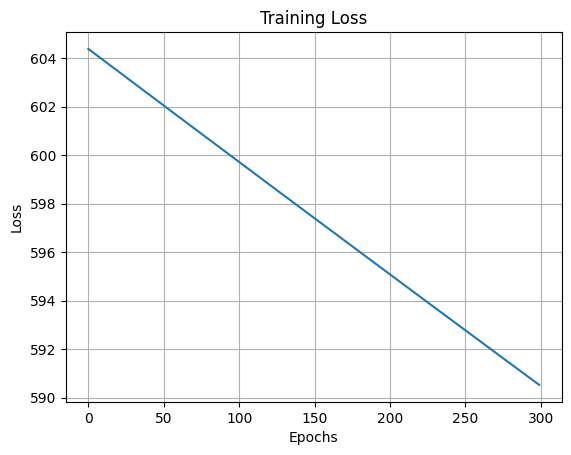

In [85]:
#predict car fuel efficiency
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


# --- dataset ----
horsepower = np.array([50, 70, 90, 110, 130, 150, 170, 200], dtype=float)
mpg = np.array([35, 32, 28, 25, 22, 18, 15, 12], dtype=float)

#visualize
plt.scatter(horsepower, mpg)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Car Fuel Efficiency")
plt.show()

#build the ANN model
carmodel = Sequential([
    Dense(8, activation='relu', input_shape=[1]),
    Dense (4, activation= 'relu'),
    Dense(1) #output
])
carmodel.compile(optimizer='adam', loss='mse')

#train the model
x=300
history = carmodel.fit(horsepower, mpg, epochs=300, verbose=0)

#plot a learning graph
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()


In [88]:
predict_hp = 200
prediction = model.predict(np.array([predict_hp]))[0][0]

print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
0.29569113


#Model Deployment

Once a model is trained, we don't need to train it again every time.  
We can save the model, load it later, and use it directly for predictions.  
This is called model deployment and it is how AI models run in real products.


In [95]:
# --------------------------------
#Save the trained CNN model
# --------------------------------
fashion_cnn_model_trained.save("fashion_cnn_model.keras")
print("\n❖ Model saved successfully as 'fashion_cnn_model.keras'!")



❖ Model saved successfully as 'fashion_cnn_model.keras'!


In [33]:
# -------------------------------------------
# PART 2 — Model Deployment Basics
# -------------------------------------------

import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

# ---- Reusing the same small dataset ----
horsepower = np.array([50, 70, 90, 110, 130, 150, 170, 200], dtype=float)
mpg = np.array([35, 32, 28, 25, 22, 18, 15, 12], dtype=float)

# ---- Train a simple model again (fast) ----
cmodel = Sequential([
    Dense(8, activation='relu', input_shape=[1]),
    Dense(4, activation='relu'),
    Dense(1)
])

cmodel.compile(optimizer='adam', loss='mse')
model.fit(horsepower, mpg, epochs=300, verbose=0)

# ---- 1) SAVE the model ----
cmodel.save("car_mpg_model.keras")
print("📁 Model saved successfully as 'car_mpg_model.keras'!")

# ---- 2) LOAD the model ----
loaded_cmodel = load_model("car_mpg_model.keras")
print("📂 Model loaded successfully!")

# ---- 3) Predict using loaded model ----
new_hp = 160
prediction = loaded_cmodel.predict(np.array([new_hp]))[0][0]

print(f"\n🚗 Prediction using saved + loaded model: {round(prediction,2)} MPG")



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


📁 Model saved successfully as 'car_mpg_model.keras'!
📂 Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

🚗 Prediction using saved + loaded model: 0.30000001192092896 MPG
